# Machine Learning - Class Exersice 1 
    
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
my_data = pd.read_csv("data/week1_home_data.csv")
my_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Show data

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


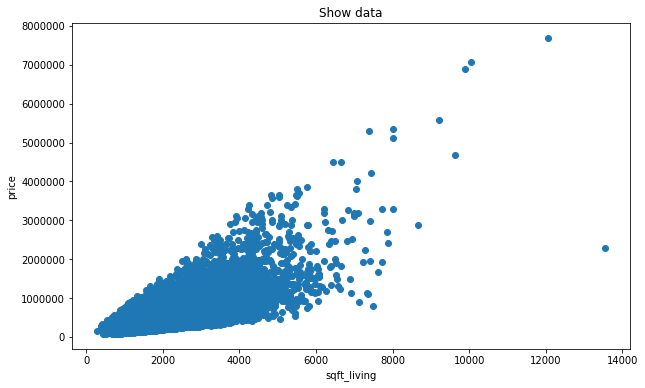

In [3]:
fig, ax= plt.subplots(figsize=(10,6))

ax.scatter(x=my_data['sqft_living'],y=my_data['price'])

ax.set(title='Show data',
       xlabel='sqft_living',
       ylabel='price')

fig.show()

## Finding Intercept & Slope

### Select the number of data that we want to find Ws on it
* All of them 
* or part of it

In [11]:
N = len(my_data[:100])

### Find the best line ($ \hat W_0 $  , $ \hat W_1 $ )
    A line that has the least error

#### Define basic variables

In [5]:
w0 = 0
w1 = 0
best_error = None

### Functions

#### Function for finding --> Total Error

In [6]:
def f_total_error(w0,w1,N):
    total_error = 0
    for i in range(N):
        error = my_data['price'][i] - (w0+w1*my_data['sqft_living'][i])
        total_error = total_error + error**2
    return total_error

#### Function for finding   
> * Best Error and  
* $ \hat W_0 $ 
* $ \hat W_1 $

In [7]:
def f_best_error(data,N,best_error,range_number):
    best_w0 = 0
    best_w1 = 0
    for w0 in range(range_number):
        for w1 in range(range_number):
            total_error = f_total_error(w0,w1,N)
            if w0==0 and w1==0:
                best_error = total_error
            elif best_error > total_error:
                best_error = total_error
                best_w0 = w0
                best_w1 = w1
    return best_w0,best_w1,best_error

#### Run Function

In [12]:
w0,w1,best_error = f_best_error(my_data,N,best_error,500)
print('w0=%d \nw1=%d \nbest_error=%d'%(w0,w1,best_error))

w0=499 
w1=246 
best_error=5314503397591


### Making a column $ \hat Y $

In [13]:
my_data['y_hat'] = w0 + w1*my_data['sqft_living']
my_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,y_hat
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,290779
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,632719
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,189919
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,482659
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,413779


### Show data & Estimated Line

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


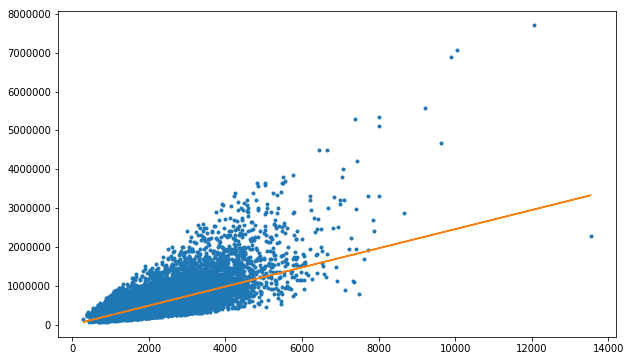

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(my_data['sqft_living'],my_data['price'],'.',
        my_data['sqft_living'],my_data['y_hat'],'-')

fig.show()